# Лабораторная работа №2

# Коррекция яркости и цвета

## Никитина Наталья, гр. РИМ-181226

In [58]:
import numpy as np
from skimage.io import imread, imshow, imsave
from numpy import clip, average, dstack
from matplotlib import pyplot as plt

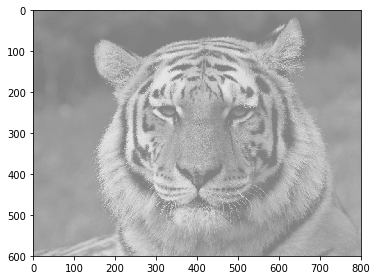

In [59]:
img=imread('https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png')
imshow(img)

## Автоконтраст черно-белого изображения

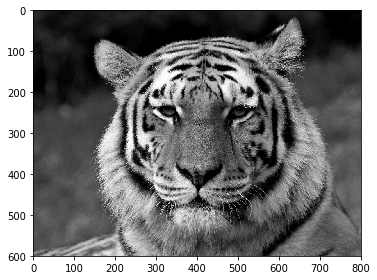

In [60]:
img=img.astype('float')

x_min = min(img.ravel())
x_max = max(img.ravel())

k=255/(x_max-x_min)

img_N=((img-x_min)*k).astype('uint8')

imshow(img_N)

### Сравнение результатов

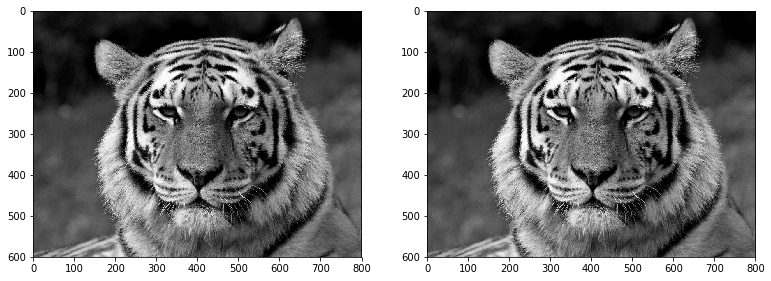

In [61]:
img_et = imread('https://stepik.org/media/attachments/lesson/58402/tiger-high-contrast.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_N)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Устойчивый автоконтраст черно-белого изображения

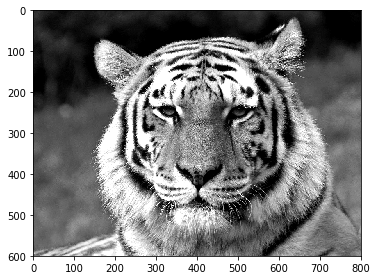

In [62]:
k = round(img.shape[0]*img.shape[1]*0.05) #подсчет минимума и максимума устойчивого автоконтраста

img_sort = img.copy() 
img_sort=img_sort.ravel()
img_sort.sort() #сортировка по яркости пикселей

x_min = img_sort[k]
x_max = img_sort[img.shape[0]*img.shape[1]-k]

img_N=(img-x_min)*255/(x_max-x_min)
img_N=clip(img_N,0,255)
img_N=img_N.astype('uint8')

imshow(img_N)

### Сравнение результатов

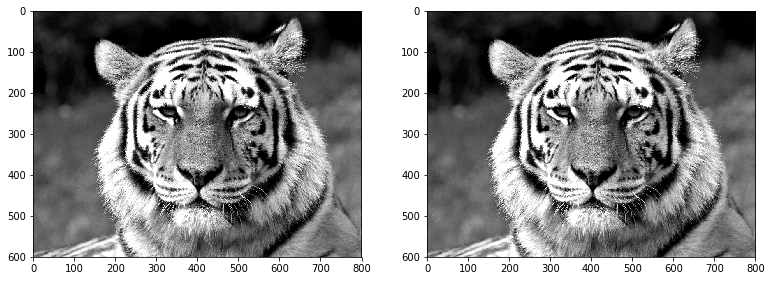

In [63]:
img_et = imread('https://stepik.org/media/attachments/lesson/58402/tiger-stable-contrast.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_N)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Устойчивый цветной автоконтраст

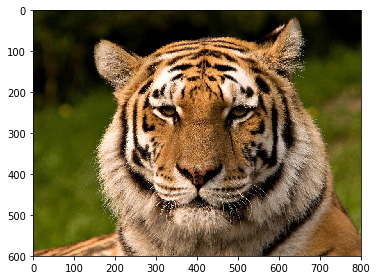

In [7]:
img=imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')
imshow(img)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


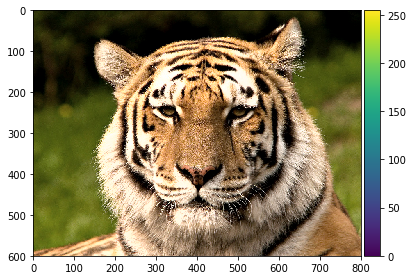

In [8]:
img=img.astype('float')

r=img[:,:,0] #выделение каналов
g=img[:,:,1]
b=img[:,:,2]

y=0.2126*r+0.7152*g+0.0722*b #перевод в пространство YUV
u=-0.0999*r-0.3360*g+0.4360*b
v=0.6150*r-0.5586*g-0.0563*b

k = round(img.shape[0]*img.shape[1]*0.05)

y_sort = y.copy()
y_sort=y_sort.ravel()
y_sort.sort()

x_min = y_sort[k]
x_max = y_sort[y.shape[0]*y.shape[1]-k]

y=(y-x_min)*255/(x_max-x_min)
y=clip(y,0,255)

r=y+1.2803*v #перевод в пространстов RGB
g=y-0.2148*u-0.3805*v
b=y+2.1279*u

img_N_yuv=dstack((r,g,b))
img_N_yuv=clip(img_N_yuv,0,255)
img_N_yuv=img_N_yuv.astype('uint')

imshow(img_N_yuv)

### Сравнение результатов

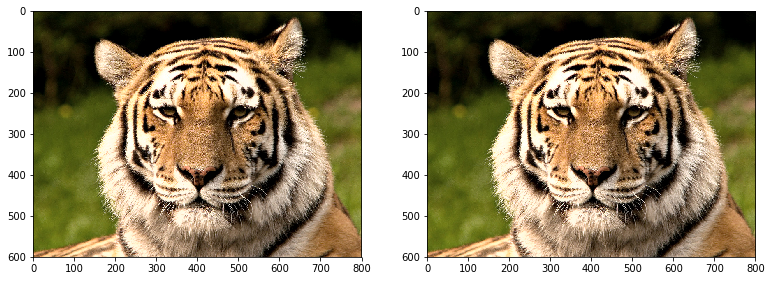

In [41]:
img_et = imread('https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(img_N_yuv)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Баланс белого. Преобразование серого мира

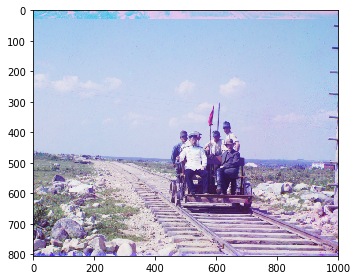

In [9]:
img=imread('https://stepik.org/media/attachments/lesson/60610/railroad.png')
imshow(img)

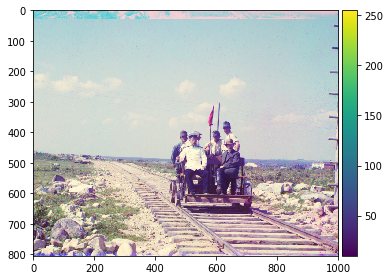

In [10]:
img=img.astype('float')

r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]

avg=(average(r.ravel())+average(g.ravel())+average(b.ravel()))/3

rw=average(r.ravel())/avg
gw=average(g.ravel())/avg
bw=average(b.ravel())/avg

r=r/rw
g=g/gw
b=b/bw

img_combined=dstack((r,g,b))
img_combined=clip(img_combined,0,255)

img_combined=img_combined.astype('uint')
imshow(img_combined)

### Сравнение результатов

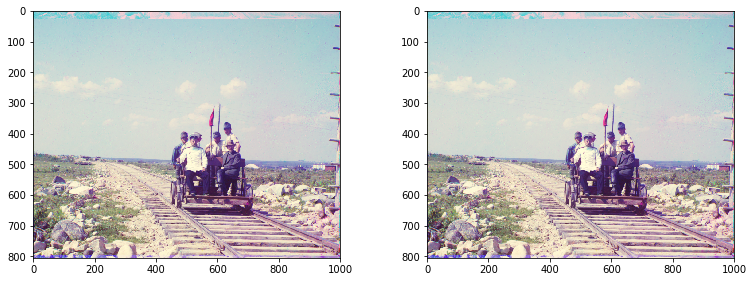

In [44]:
img_et = imread('https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(img_combined)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Выравнивание гистограммы

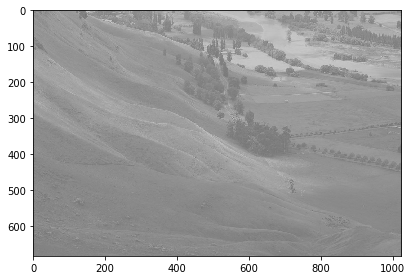

In [11]:
img=imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
imshow(img)

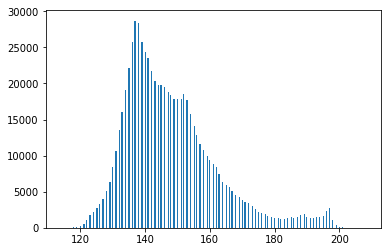

In [23]:
hist = plt.hist(img.ravel(),bins=257) #исходная гистограмма изображения

In [24]:
hist=np.zeros(256,np.int32) #вычисление гистограммы

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        value=img[i][j]
        hist[value]+=1

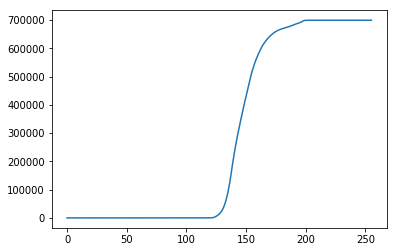

In [26]:
cdf=np.zeros(256,np.int32) #вычисление функции распределения

for i in range(256):
    cdf[i]=sum(hist[0:i])

plt.plot(cdf)

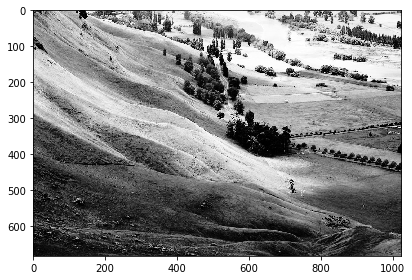

In [27]:
img_histeq=np.zeros((img.shape[0],img.shape[1]))
cdf_min=min(cdf>0)

for i in range(img.shape[0]): #выравнивание гистограммы
    for j in range(img.shape[1]):
        x=img[i][j]
        img_histeq[i][j]=round((cdf[x]-cdf_min)/(img.shape[0]*img.shape[1]-1)*255)
        
img_histeq=clip(img_histeq,0,255)
img_histeq=img_histeq.astype('uint8')

imshow(img_histeq)

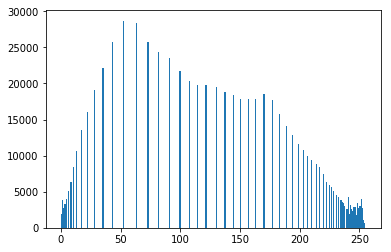

In [28]:
hist_eq = plt.hist(img_histeq.ravel(),bins=257) #выровненная гистограмма изображения

### Сравнение результатов

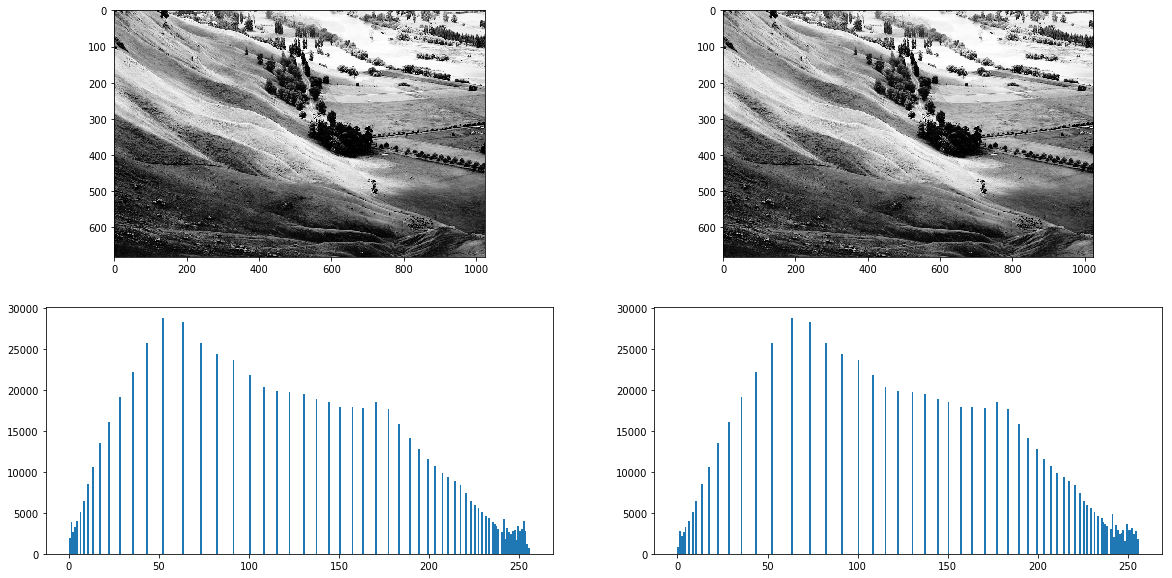

In [53]:
img_et = imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img_histeq)
plt.subplot(2,2,2)
plt.imshow(img_et)
plt.subplot(2,2,3)
_, __, ___ = plt.hist(img_histeq.ravel(), bins=range(257))
plt.subplot(2,2,4)
_, __, ___ = plt.hist(img_et.ravel(), bins=range(257))